In [ ]:
 #REGRESSION  PROJECT NO: 01
#California Housing Price Prediction - End-to-End Machine


In [ ]:
#Step 1: Understanding the Dataset
'''The California housing dataset is a regression dataset used for predicting house prices based on
various features.
Dataset Features:
MedInc: Median income in block group
HouseAge: Median house age in block group
AveRooms: Average number of rooms per household
AveBedrms: Average number of bedrooms per household
Population: Population in block group
AveOccup: Average number of household members
Latitude: Latitude coordinate
Longitude: Longitude coordinate
MedHouseVal: Target variable (median house value in block group)'''

'The California housing dataset is a regression dataset used for predicting house prices based on\nvarious features.\nDataset Features:\nMedInc: Median income in block group\nHouseAge: Median house age in block group\nAveRooms: Average number of rooms per household\nAveBedrms: Average number of bedrooms per household\nPopulation: Population in block group\nAveOccup: Average number of household members\nLatitude: Latitude coordinate\nLongitude: Longitude coordinate\nMedHouseVal: Target variable (median house value in block group)'

In [ ]:
#Step 2: Importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

In [ ]:
#Step 3: Loading the Dataset
# Import the California Housing dataset from sklearn.datasets
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california = fetch_california_housing()

# Create a pandas DataFrame with the feature data
# 'california.data' contains the input features, and 'california.feature_names' provides column names
data = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target variable (housing prices) to the DataFrame
# 'california.target' contains the median house value for each district
data['MedHouseVal'] = california.target

# Display the first 5 rows of the dataset
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Step 4: Data Exploration and Cleaning

# Display information about the dataset such as column names, data types, and non-null counts
data.info()
# Check for any missing values in each column of the dataset
data.isnull().sum()
# Generate descriptive statistics (like mean, std, min, max, etc.) for all numerical features
# Transpose is used to make the output more readable (features as rows)
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


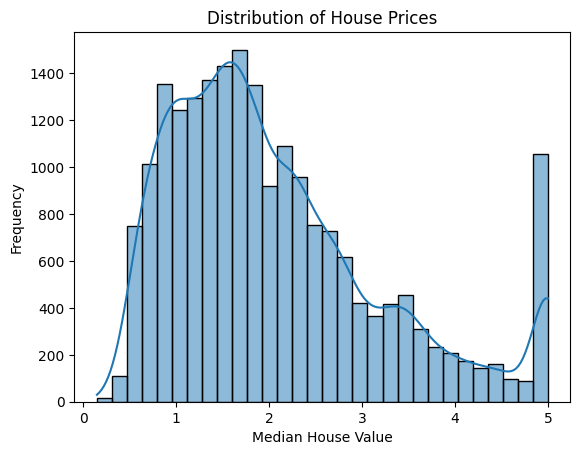

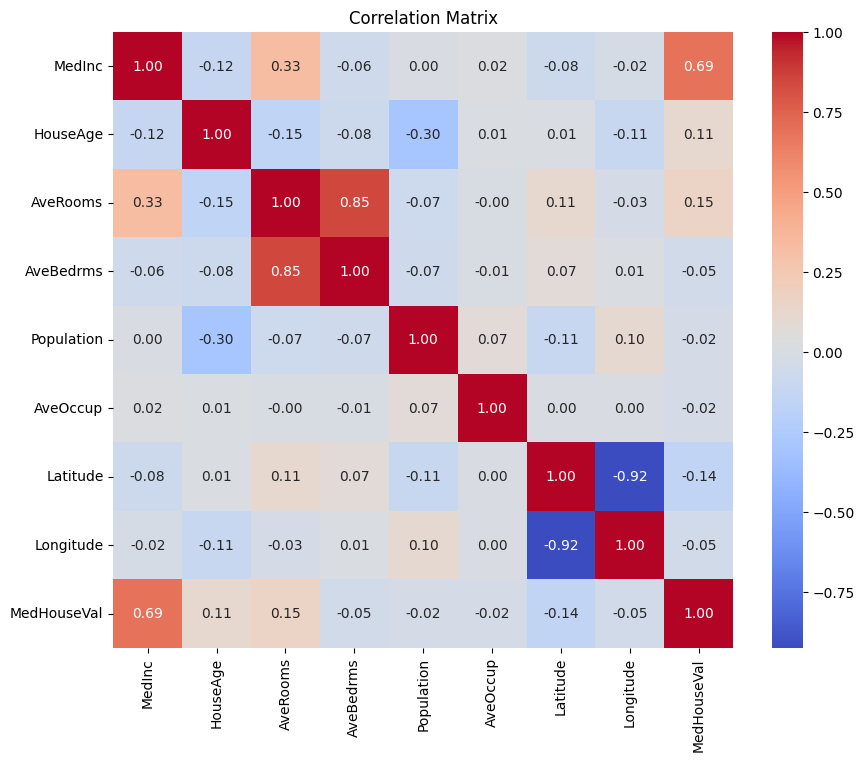

In [ ]:
#Step 5: Exploratory Data Analysis (EDA)

# Plot the distribution of the target variable 'MedHouseVal'
sns.histplot(data['MedHouseVal'], bins=30, kde=True)  # Histogram with 30 bins and a KDE curve for smooth distribution
plt.title('Distribution of House Prices')               # Title of the plot
plt.xlabel('Median House Value')                        # X-axis label
plt.ylabel('Frequency')                                  # Y-axis label
plt.show()                                               # Display the plot


# Plot the correlation matrix to see how features relate to each other and to the target
plt.figure(figsize=(10,8))                            # Set figure size for better visibility
sns.heatmap(data.corr(),                              # Compute and plot the correlation matrix
            annot=True,                               # Annotate each cell with the numeric correlation value
            cmap='coolwarm',                          # Use 'coolwarm' colormap for better contrast
            fmt='.2f')                                   # Format annotations to 2 decimal places
plt.title('Correlation Matrix')                         # Title of the heatmap
plt.show()                                              # Display the plot


In [ ]:
#Step 6: Data Preprocessing

#1. Splitting Data into Features and Target

# Separate features (independent variables) and target (dependent variable)
X = data.drop(columns=['MedHouseVal'])    # Features: All columns except the target column
y = data['MedHouseVal']               # Target: Median house value (the variable we want to predict)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                                    # Input features and target
    test_size=0.2,                          # 20% of data will be used for testing
    random_state=42                         # Set random seed for reproducibility
)

In [ ]:
#2. Feature Scaling
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform them
X_train = scaler.fit_transform(X_train)
# Use the same scaler (already fitted on training data) to transform the test features
X_test = scaler.transform(X_test)

In [ ]:
#Step 7: Model Training & Evaluation

#1. Defining Models
models = {
    'Linear Regression': LinearRegression(),              # Basic regression model
    'Ridge Regression': Ridge(alpha=1.0),                 # Regularized version of linear regression (L2 penalty)
    'Lasso Regression': Lasso(alpha=0.1),                # L1 penalty, can shrink coefficients to zero
    'Decision Tree': DecisionTreeRegressor(max_depth=5), # Tree-based regression model, depthlimited for simplicity
    'Random Forest': RandomForestRegressor(n_estimators=100),   # Ensemble of decision treesfor better performance
}

In [ ]:
#2. Training & Evaluating Models

results = []  # To store evaluation metrics for each model

for model_name, model in models.items():
    model.fit(X_train, y_train)             # Train the model using training data
    y_pred = model.predict(X_test)          # Predict target values for test data
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)       # Mean Squared Error
    mae = mean_absolute_error(y_test, y_pred)      # Mean Absolute Error
    r2 = r2_score(y_test, y_pred)                 # R² Score (how well model explains variance in target)

    # Save results in list
    results.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

     # Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

               Model       MSE       MAE  R2 Score
0  Linear Regression  0.555892  0.533200  0.575788
1   Ridge Regression  0.555855  0.533193  0.575816
2   Lasso Regression  0.679629  0.622201  0.481361
3      Decision Tree  0.524515  0.522259  0.599732
4      Random Forest  0.252852  0.325513  0.807044


In [ ]:
#Step 8: Saving the Best Model

import pickle

#  Step 1: Define and Train the Best Model
# Using Random Forest as the best model based on previous evaluation
best_model = RandomForestRegressor(n_estimators=100)
# Train the model on the training dataset
best_model.fit(X_train, y_train)

#  Step 2: Save the Trained Model to a Pickle File
with open('best_model.pkl', 'wb') as model_file:
    # Save the trained model for future use (deployment or inferencing)
    pickle.dump(best_model, model_file)

#  Step 3: Save the Scaler Used During Preprocessing
with open('scaler.pkl', 'wb') as scaler_file:
    # Save the scaler to ensure consistent feature scaling during prediction
    pickle.dump(scaler, scaler_file)

In [ ]:
import pickle
import numpy as np

# Load the trained model
with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the scaler
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

def predict_house_value(features):
    """
    Predict the median house value given input features.

    Parameters:
        features (list or array): A list or 1D NumPy array with 8 elements:
            [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]

    Returns:
        float: Predicted median house value.
    """

    # Check input length
    if len(features) != 8:
        raise ValueError("Input must contain exactly 8 features.")

    # Convert to NumPy array and reshape
    features_array = np.array(features).reshape(1, -1)

    # Apply the same scaling as training data
    features_scaled = scaler.transform(features_array)

    # Predict using the trained model
    prediction = model.predict(features_scaled)

    return prediction[0]


In [ ]:
sample_input = [8.3014, 21.0, 6.238137, 0.971880, 2401.0, 2.109842, 37.86, -122.22]
predicted_value = predict_house_value(sample_input)
print(f"Predicted Median House Value: {predicted_value:.3f}")


Predicted Median House Value: 3.932


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
